# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import open_weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#define base and query URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={open_weather_key}&q={cities[0]}&units={units}"

#get response
response = requests.get(query_url).json()

#print response and analyze format
response


{'coord': {'lon': 159.97, 'lat': 59.12},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 12.29,
  'feels_like': 1.17,
  'temp_min': 12.29,
  'temp_max': 12.29,
  'pressure': 1005,
  'humidity': 77,
  'sea_level': 1005,
  'grnd_level': 984},
 'wind': {'speed': 9.13, 'deg': 65},
 'clouds': {'all': 100},
 'dt': 1584137477,
 'sys': {'country': 'RU', 'sunrise': 1584128390, 'sunset': 1584170340},
 'timezone': 43200,
 'id': 2122262,
 'name': 'Palana',
 'cod': 200}

In [4]:
#create summary dict
data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}

#set counts for print statment in loop
number = 0
sets = 1

#loop through cities in list
for item in cities:
    try:
        #redefine query_url and response for each city in the loop
        query_url = f"{url}appid={open_weather_key}&q={item}&units={units}"
        response = requests.get(query_url).json()
        #update print statement count and print
        number = number + 1
        print(f"Processing Record {number} of Set {sets} | {item}")
        #append summary dict with appropriate data
        data["City"].append(response['name'])
        data["Cloudiness"].append(response['clouds']['all'])
        data["Country"].append(response['sys']['country'])
        data["Date"].append(response['dt'])
        data["Humidity"].append(response['main']['humidity'])
        data["Lat"].append(response['coord']['lat'])
        data["Lng"].append(response['coord']['lon'])
        data["Max Temp"].append(response['main']['temp_max'])
        data["Wind Speed"].append(response['wind']['speed'])
    #create exception
    except:
        print("City not found. Skipping ...")
    #reset set counts after 50 records
    if number == 50:
        sets = sets+1
        number = 0
    #limit API requests
    time.sleep(1)

Processing Record 1 of Set 1 | palana
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kaeo
Processing Record 4 of Set 1 | ballina
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | horsham
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | pirawa
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping ...
Processing Record 15 of Set 1 | tuatapere
Processing Record 16 of Set 1 | naryan-mar
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | diebougou
Processing Record 22 of Set 1 | castro
Processing Record 23 of Set 1 | sola
Processing Record 24 of Set 1 | new no

Processing Record 36 of Set 4 | conakry
Processing Record 37 of Set 4 | la ronge
Processing Record 38 of Set 4 | lompoc
Processing Record 39 of Set 4 | kamenka
Processing Record 40 of Set 4 | turukhansk
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | yangliuqing
Processing Record 45 of Set 4 | hihifo
City not found. Skipping ...
Processing Record 46 of Set 4 | klyuchevskiy
Processing Record 47 of Set 4 | de-kastri
Processing Record 48 of Set 4 | tibacuy
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | port hedland
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | qasigiannguit
Processing Record 6 of Set 5 | zhongshu
Processing Record 7 of Set 5 | samarai
Processing Record 8 of Set 5 | lalomanu
City not found. Skippin

Processing Record 26 of Set 8 | zhuhai
Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | dovolnoye
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | ekhabi
Processing Record 32 of Set 8 | morant bay
Processing Record 33 of Set 8 | oistins
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | paita
Processing Record 36 of Set 8 | falealupo
City not found. Skipping ...
Processing Record 37 of Set 8 | salalah
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | fare
Processing Record 40 of Set 8 | pingliang
Processing Record 41 of Set 8 | shihezi
Processing Record 42 of Set 8 | toliary
City not found. Skipping ...
Processing Record 43 of Set 8 | araouane
Processing Record 44 of Set 8 | zverinogolovskoye
Processing Record 45 of Set 8 | denau
City not found. Skipping ...
Processing Record 46 of Set 8 | sungaipenuh
Processing Record 47 of Set 8 | ca

Processing Record 12 of Set 12 | nouadhibou
Processing Record 13 of Set 12 | aras
Processing Record 14 of Set 12 | bargal
City not found. Skipping ...
Processing Record 15 of Set 12 | bouar
Processing Record 16 of Set 12 | san bartolome
Processing Record 17 of Set 12 | sarany
Processing Record 18 of Set 12 | adwa
Processing Record 19 of Set 12 | vilhena
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | velur
Processing Record 23 of Set 12 | celestun
Processing Record 24 of Set 12 | moose factory
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | luwingu
Processing Record 27 of Set 12 | mahaicony
City not found. Skipping ...
Processing Record 28 of Set 12 | loudi
Processing Record 29 of Set 12 | odda
Processing Record 30 of Set 12 | kizukuri
Processing Record 31 of Set 12 | da nang
Processing Record 32 of Set 12 | wajir
Processing Record 33 of Set 12 | dukat
Processing Record 34 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert summary dict to dataframe and display
city_data_df = pd.DataFrame(data)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palana,100,RU,1584137477,77,59.12,159.97,12.29,9.13
1,Jamestown,75,US,1584137478,55,42.10,-79.24,44.60,24.16
2,Kaeo,1,NZ,1584137479,77,-35.10,173.78,66.99,4.00
3,Ballina,8,AU,1584137480,82,-28.87,153.57,68.00,5.82
4,Ushuaia,20,AR,1584137481,71,-54.80,-68.30,53.60,4.70
...,...,...,...,...,...,...,...,...,...
544,Nyurba,0,RU,1584138128,94,63.28,118.33,-21.91,4.50
545,Luchenza,97,MW,1584138129,94,-16.01,35.31,65.75,3.53
546,Kallaste,66,EE,1584138130,72,58.66,27.16,32.00,6.93
547,Kolosovka,100,RU,1584138131,86,56.47,73.61,26.69,13.98


In [6]:
#export dataframe to CSV file
city_data_df.to_csv("Output/city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

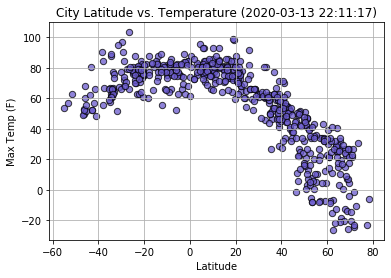

In [7]:
#defines variable to plot
max_temp = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]
#set date
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s')
date = city_data_df["Date"][0]
#create plot
plt.scatter(latitude, max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Humidity Plot

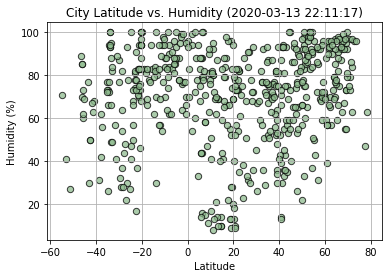

In [8]:
#defines variable to plot
humidity = city_data_df["Humidity"]
#create plot
plt.scatter(latitude, humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Cloudiness Plot

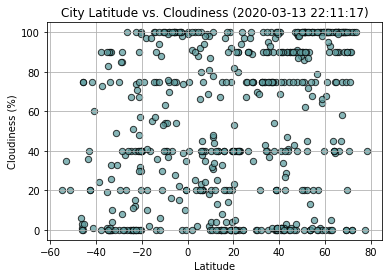

In [9]:
#defines variable to plot
cloudiness = city_data_df["Cloudiness"]
#create plot
plt.scatter(latitude, cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')

#### Latitude vs. Wind Speed Plot

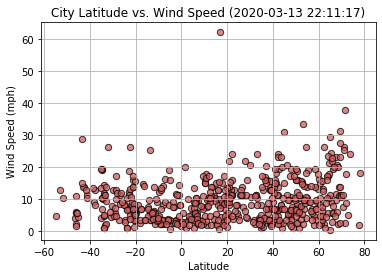

In [10]:
#defines variable to plot
wind_speed = city_data_df["Wind Speed"]
#create plot
plt.scatter(latitude, wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis='both')

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
'''
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
'''

def lin_reg(x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [line_eq, rvalue**2]


In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palana,100,RU,2020-03-13 22:11:17,77,59.12,159.97,12.29,9.13
1,Jamestown,75,US,2020-03-13 22:11:18,55,42.10,-79.24,44.60,24.16
5,Horsham,100,GB,2020-03-13 22:11:22,75,51.06,-0.33,46.40,5.82
6,Tiksi,0,RU,2020-03-13 22:11:23,84,71.69,128.87,-24.25,2.46
7,Tasiilaq,100,GL,2020-03-13 22:11:24,66,65.61,-37.64,10.40,5.82
...,...,...,...,...,...,...,...,...,...
542,Severnoye,79,RU,2020-03-13 22:22:06,93,56.35,78.36,19.31,9.01
543,Kédougou,4,SN,2020-03-13 22:22:07,21,12.56,-12.17,93.20,4.70
544,Nyurba,0,RU,2020-03-13 22:22:08,94,63.28,118.33,-21.91,4.50
546,Kallaste,66,EE,2020-03-13 22:22:10,72,58.66,27.16,32.00,6.93


In [13]:
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Kaeo,1,NZ,2020-03-13 22:11:19,77,-35.10,173.78,66.99,4.00
3,Ballina,8,AU,2020-03-13 22:11:20,82,-28.87,153.57,68.00,5.82
4,Ushuaia,20,AR,2020-03-13 22:11:21,71,-54.80,-68.30,53.60,4.70
8,Cidreira,0,BR,2020-03-13 22:11:25,87,-30.18,-50.21,77.27,8.01
10,Mataura,1,NZ,2020-03-13 22:11:28,85,-46.19,168.86,49.37,2.13
...,...,...,...,...,...,...,...,...,...
534,Ikalamavony,30,MG,2020-03-13 22:21:56,75,-21.15,46.58,64.31,6.98
536,Tocopilla,71,CL,2020-03-13 22:21:58,37,-22.09,-70.20,72.59,10.83
538,Upington,0,ZA,2020-03-13 22:22:01,28,-28.45,21.26,68.00,4.70
545,Luchenza,97,MW,2020-03-13 22:22:09,94,-16.01,35.31,65.75,3.53


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

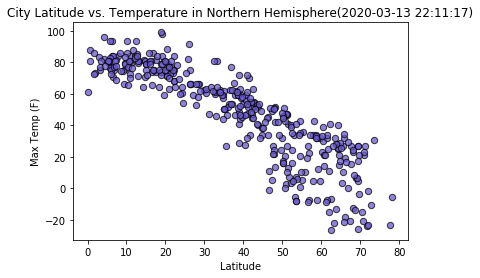

In [14]:
#defines variable to plot
n_max_temp = northern_df["Max Temp"]
n_latitude = northern_df["Lat"]

#create plot
plt.scatter(n_latitude, n_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

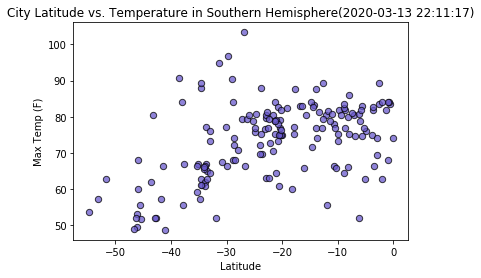

In [15]:
#defines variable to plot
s_max_temp = southern_df["Max Temp"]
s_latitude = southern_df["Lat"]

#create plot
plt.scatter(s_latitude, s_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

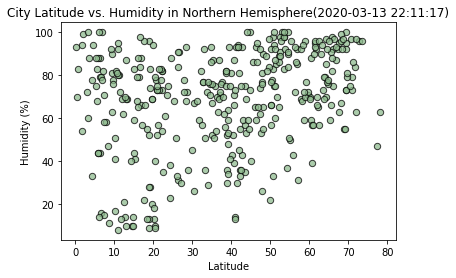

In [16]:
#defines variable to plot
n_humidity = northern_df["Humidity"]
#create plot
plt.scatter(n_latitude, n_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

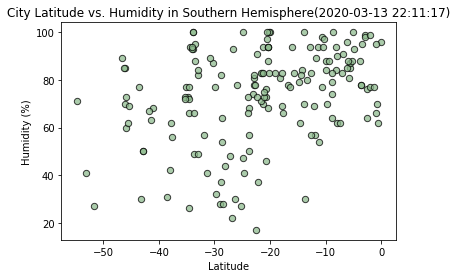

In [17]:
#defines variable to plot
s_humidity = southern_df["Humidity"]
#create plot
plt.scatter(s_latitude, s_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

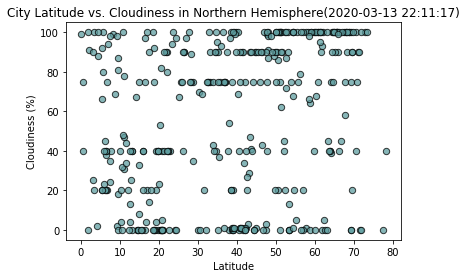

In [18]:
#defines variable to plot
n_cloudiness = northern_df["Cloudiness"]
#create plot
plt.scatter(n_latitude, n_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

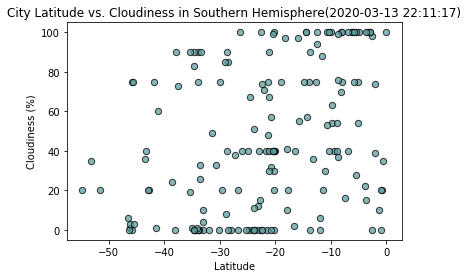

In [19]:
#defines variable to plot
s_cloudiness = southern_df["Cloudiness"]
#create plot
plt.scatter(s_latitude, s_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

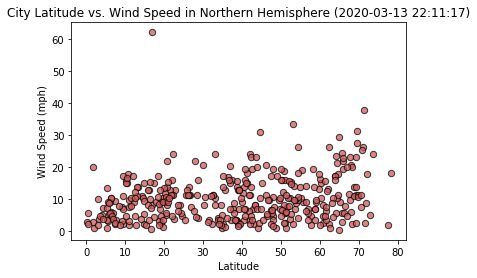

In [20]:
#defines variable to plot
n_wind_speed = northern_df["Wind Speed"]
#create plot
plt.scatter(n_latitude, n_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Northern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

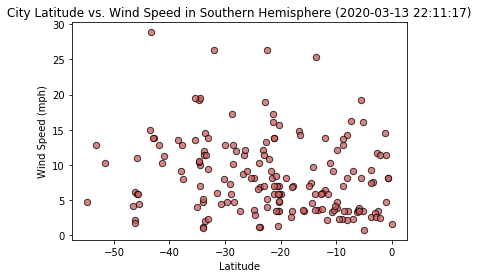

NameError: name 'linear_regress' is not defined

In [21]:
#defines variable to plot
s_wind_speed = southern_df["Wind Speed"]
#create plot
plt.scatter(s_latitude, s_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Southern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
#linear regression
linear_regress(s_latitude, s_wind_speed)